In [93]:
# Drive ile Colab notebook bağlama
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**YAPAY ÖĞRENME İLE YETENEK AVCILIĞI SINIFLANDIRMA**

**İş Problemi**

Scoutlar tarafından izlenen futbolcuların özelliklerine verilen puanlara göre, oyuncuların hangi sınıf (average, highlighted) oyuncu olduğunu tahminleme.

**Veriseti Hikayesi**

Veri seti Scoutium’dan maçlarda gözlemlenen futbolcuların özelliklerine göre scoutların değerlendirdikleri futbolcuların, maç içerisinde puanlanan özellikleri ve puanlarını içeren bilgilerden oluşmaktadır.

**attributes:** Oyuncuları değerlendiren kullanıcıların bir maçta izleyip değerlendirdikleri her oyuncunun özelliklerine verdikleri puanları içeriyor. (bağımsız değişkenler)

**potential_labels:** Oyuncuları değerlendiren kullanıcıların her bir maçta oyuncularla ilgili nihai görüşlerini içeren potansiyel etiketlerini içeriyor. (hedef değişken)

**9 Değişken, 10730 Gözlem, 0.65 mb**

Değişkenler

#####################################################

**scoutium_attributes.csv**

8 Değişken     10.730 Gözlem

**task_response_id:** Bir scoutun bir maçta bir takımın kadrosundaki tüm oyunculara dair değerlendirmelerinin kümesi.

**match_id:** İlgili maçın id'si.

**evaluator_id:** Değerlendiricinin(scout'un) id'si.

**player_id:** İlgili oyuncunun id'si.

**position_id:** İlgili oyuncunun o maçta oynadığı pozisyonun id'si.

1- Kaleci

2- Stoper

3- Sağ bek

4- Sol bek

5- Defansif orta saha

6- Merkez orta saha

7- Sağ kanat

8- Sol kanat

9- Ofansif orta saha

10- Forvet


**analysis_id:** Bir scoutun bir maçta bir oyuncuya dair özellik değerlendirmelerini içeren küme.


**attribute_id:** Oyuncuların değerlendirildiği her bir özelliğin id'si.


**attribute_value:** Bir scoutun bir oyuncunun bir özelliğine verilen değer(puan).


**potential_label:** Bir scoutun bir maçta bir oyuncuyla ilgili nihai kararını belirten etiket. (hedef değişken)



########################################################

**scoutium_potential_labels.csv**

5 Değişken 322 Gözlem

**task_response_id   :** Bir scoutun bir maçta bir takımın kadrosundaki tüm oyunculara dair değerlendirmelerinin kümesi

**match_id           :** İlgili maçın id'si

**evaluator_id       :** Değerlendiricinin(scout'un) id'si

**player_id          :** İlgili oyuncunun id'si

**potential_label    :** Bir scoutun bir maçta bir oyuncuyla ilgili nihai kararını belirten etiket.

(hedef değişken)

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# data frame in sınırlamalarını kaldırıyoruz

pd.set_option('display.max_columns', None)  # bütün sütunları göster
pd.set_option('display.max_rows', None)     # bütün satırları göster
pd.set_option('display.width', 500)  # sütunlar max 500 tane gösterilsin
pd.set_option('display.expand_frame_repr', False)  # çıktının tek bir satırda olmasını sağlar


GÖREVLER

Veri Setinin Hazırlanması

Adım 1: scoutium_attributes.csv ve scoutium_potential_labels.csv dosyalarını okutunuz.

In [96]:
df_att = pd.read_csv("/content/drive/MyDrive/COLAB/HousePrice_Scoutium/Scoutium/scoutium_attributes.csv", sep=";")
df_att.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [97]:
df_pot = pd.read_csv("/content/drive/MyDrive/COLAB/HousePrice_Scoutium/Scoutium/scoutium_potential_labels.csv", sep=";")
df_pot.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


Adım 2: Okutmuş olduğumuz csv dosyalarını merge fonksiyonunu kullanarak birleştiriniz. ("task_response_id", 'match_id', 'evaluator_id' "player_id"  4 adet değişken üzerinden birleştirme işlemini gerçekleştiriniz.)

In [ ]:
df = pd.merge(df_att, df_pot, how='left', on=["task_response_id", 'match_id', 'evaluator_id', "player_id"])
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [ ]:
df.to_csv(r"scout_merged.csv", index=False, header=True)          # C:\Users\GunalHincal\Downloads\

Adım 3: position_id içerisindeki Kaleci (1) sınıfını veri setinden kaldırınız.




In [98]:
df.shape

(9894, 9)

In [ ]:
# position_id sınıfı 1 dışında olan herşeyi df_scout a geri kaydet dedik, yani kaleci pozisyonlarını veri setimizden çıkarıyoruz
df = df[~(df["position_id"] == 1)]

In [ ]:
# ya da bunu kullanabilirdik
df = df[df["position_id"] != 1]

In [ ]:
df.shape  # (10030, 9) -- 700 satır gitmiş

(10030, 9)

Adım 4: potential_label içerisindeki below_average sınıfını veri setinden kaldırınız.

( below_average sınıfı tüm verisetinin %1'ini oluşturur)

In [ ]:
df["potential_label"].value_counts()
# average          7922
# highlighted      1972
# below_average     136

average          7922
highlighted      1972
below_average     136
Name: potential_label, dtype: int64

In [ ]:
df = df[~(df["potential_label"] == "below_average")]
df["potential_label"].value_counts()
# average        7922
# highlighted    1972

average        7922
highlighted    1972
Name: potential_label, dtype: int64

In [ ]:
df["attribute_value"].value_counts()  #  Bir scoutun bir oyuncunun bir özelliğine verilen değer(puan).

67.0     3222
56.0     1890
45.0     1699
34.0     1264
78.0     1172
23.0      572
12.0       39
89.0       32
100.0       3
1.0         1
Name: attribute_value, dtype: int64

In [ ]:
df["attribute_id"].value_counts()  # Oyuncuların değerlendirildiği her bir özelliğin id'si.

4322    291
4353    291
4345    291
4348    291
4349    291
4350    291
4351    291
4352    291
4354    291
4323    291
4355    291
4356    291
4357    291
4407    291
4408    291
4423    291
4344    291
4343    291
4342    291
4341    291
4340    291
4339    291
4338    291
4335    291
4333    291
4332    291
4330    291
4329    291
4328    291
4327    291
4326    291
4325    291
4324    291
4426    291
Name: attribute_id, dtype: int64

In [ ]:
df["attribute_id"].nunique()  # 34 adet özellik olduğunu görüyoruz

34

In [ ]:
df["player_id"].value_counts()  # İlgili oyuncunun id'si

1361061    102
1364951    102
1369065    102
1370976    102
1361626    102
1372639     68
1907330     68
1356375     68
1356411     68
1361007     68
1367714     68
1378444     68
1906235     68
1906237     68
1907347     68
1372696     68
1372673     68
1614690     68
1372666     68
1355710     68
1361549     68
1363266     68
1367734     68
1367783     68
1369525     68
1369546     68
1906234     68
1372675     68
1371171     68
1586351     68
1362468     68
1361858     68
1364697     68
1362220     68
1369055     68
1371160     68
1371159     68
1371149     68
1716960     34
1716961     34
1716959     34
1716962     34
1716963     34
1716964     34
1716965     34
1716966     34
1359355     34
1716967     34
1359349     34
1598367     34
1359357     34
1359389     34
1359390     34
1359394     34
1359398     34
1369191     34
1369198     34
1716958     34
1368804     34
1377312     34
1377276     34
1376343     34
1414202     34
1498208     34
1360989     34
1369064     34
1377237   

In [ ]:
df["player_id"].nunique()  # 248 adet oyuncu görüyoruz

248

In [ ]:
df.shape

(9894, 9)

In [ ]:
# ya da ~ kullanmadan bu şekilde de yapabilirdik
df = df[df["potential_label"] != "below_average"]
df.shape  # (9894, 9)

Adım 5: Oluşturduğunuz verisetinden “pivot_table” fonksiyonunu kullanarak bir tablo oluşturunuz. Bu pivot table'da her satır bir oyuncu olacak şekilde manipülasyon yapınız.

Adım 5-1: İndekste “player_id”,“position_id” ve “potential_label”, sütunlarda “attribute_id” ve değerlerde scout’ların oyunculara verdiği puan “attribute_value” olacak şekilde pivot table’ı oluşturunuz.

In [ ]:
pivot = df.pivot_table(index=["player_id", "position_id", "potential_label"],
                             columns="attribute_id",
                             values="attribute_value")
pivot.head()

attribute_id                           4322  4323  4324  4325  4326  4327  4328  4329  4330  4332  4333  4335  4338  4339  4340  4341  4342  4343  4344  4345  4348  4349  4350  4351  4352  4353  4354  4355  4356  4357  4407  4408  4423  4426
player_id position_id potential_label                                                                                                                                                                                                            
1355710   7           average          50.5  50.5  34.0  50.5  45.0  45.0  45.0  45.0  50.5  56.0  39.5  34.0  39.5  39.5  45.0  45.0  50.5  28.5  23.0  39.5  28.5  28.5  45.0  50.5  56.0  34.0  39.5  50.5  34.0  34.0  56.0  34.0  34.0  56.0
1356362   9           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
1356375   3           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0  67.0  67.0  67.0  67.0  67.0  56.0  56.0  67.0  67.0  56.0  56.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
          4           average          67.0  78.0  67.0  67.0  67.0  78.0  78.0  78.0  56.0  67.0  67.0  67.0  78.0  78.0  56.0  67.0  67.0  45.0  45.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  56.0  67.0  56.0  67.0  45.0  56.0
1356411   9           average          67.0  67.0  78.0  78.0  67.0  67.0  67.0  67.0  89.0  78.0  67.0  67.0  67.0  56.0  56.0  67.0  78.0  56.0  56.0  67.0  56.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  89.0  56.0  67.0  78.0

In [ ]:
# ya da
pivot = pd.pivot_table(df, values="attribute_value", columns="attribute_id", index=["player_id","position_id","potential_label"])

Adım 5-2: “reset_index” fonksiyonunu kullanarak indeksleri değişken olarak atayınız ve “attribute_id” sütunlarının isimlerini string e çeviriniz. (df.columns.map(str))

In [ ]:
pivot.dtypes

attribute_id
4322    float64
4323    float64
4324    float64
4325    float64
4326    float64
4327    float64
4328    float64
4329    float64
4330    float64
4332    float64
4333    float64
4335    float64
4338    float64
4339    float64
4340    float64
4341    float64
4342    float64
4343    float64
4344    float64
4345    float64
4348    float64
4349    float64
4350    float64
4351    float64
4352    float64
4353    float64
4354    float64
4355    float64
4356    float64
4357    float64
4407    float64
4408    float64
4423    float64
4426    float64
dtype: object

In [ ]:
pivot = pivot.reset_index(drop=False)

In [ ]:
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,45.0,50.5,56.0,39.5,34.0,39.5,39.5,45.0,45.0,50.5,28.5,23.0,39.5,28.5,28.5,45.0,50.5,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,67.0,56.0,56.0,67.0,67.0,56.0,56.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,78.0,56.0,67.0,67.0,67.0,78.0,78.0,56.0,67.0,67.0,45.0,45.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,67.0,89.0,78.0,67.0,67.0,67.0,56.0,56.0,67.0,78.0,56.0,56.0,67.0,56.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [ ]:
pivot.dtypes  # indexleri de artık kolon olarak görmekteyiz

attribute_id
player_id            int64
position_id          int64
potential_label     object
4322               float64
4323               float64
4324               float64
4325               float64
4326               float64
4327               float64
4328               float64
4329               float64
4330               float64
4332               float64
4333               float64
4335               float64
4338               float64
4339               float64
4340               float64
4341               float64
4342               float64
4343               float64
4344               float64
4345               float64
4348               float64
4349               float64
4350               float64
4351               float64
4352               float64
4353               float64
4354               float64
4355               float64
4356               float64
4357               float64
4407               float64
4408               float64
4423               float64
4426           

In [ ]:
# sayısal olan kolon adlarını string e çeviriyoruz
pivot.columns = pivot.columns.map(str)
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,45.0,50.5,56.0,39.5,34.0,39.5,39.5,45.0,45.0,50.5,28.5,23.0,39.5,28.5,28.5,45.0,50.5,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,67.0,56.0,56.0,67.0,67.0,56.0,56.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,78.0,56.0,67.0,67.0,67.0,78.0,78.0,56.0,67.0,67.0,45.0,45.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,67.0,89.0,78.0,67.0,67.0,67.0,56.0,56.0,67.0,78.0,56.0,56.0,67.0,56.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [ ]:
pivot.to_csv(r"scout_pivot.csv", index=False, header=True)  # eğer yeni pivotlanmış dataframe i csv olarak kaydetmek isterseniz

Adım 6: Label Encoder fonksiyonunu kullanarak “potential_label” kategorilerini (average, highlighted) sayısal olarak ifade ediniz.

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


labelEncoderCols = ["potential_label"]

for col in labelEncoderCols:
    pivot = label_encoder(pivot, col)

In [ ]:
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,45.0,50.5,56.0,39.5,34.0,39.5,39.5,45.0,45.0,50.5,28.5,23.0,39.5,28.5,28.5,45.0,50.5,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,67.0,56.0,56.0,67.0,67.0,56.0,56.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,78.0,56.0,67.0,67.0,67.0,78.0,78.0,56.0,67.0,67.0,45.0,45.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,67.0,89.0,78.0,67.0,67.0,67.0,56.0,56.0,67.0,78.0,56.0,56.0,67.0,56.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [ ]:
pivot.tail()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
266,1907347,5,0,67.0,78.0,78.0,56.0,78.0,67.0,78.0,67.0,56.0,78.0,78.0,56.0,67.0,67.0,78.0,56.0,67.0,56.0,56.0,67.0,78.0,89.0,67.0,78.0,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,56.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,0,56.0,45.0,45.0,45.0,56.0,56.0,56.0,56.0,23.0,23.0,34.0,45.0,56.0,34.0,23.0,45.0,45.0,23.0,23.0,34.0,23.0,23.0,34.0,23.0,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,67.0,67.0,78.0,78.0,78.0,67.0,78.0,67.0,78.0,56.0,56.0,78.0,78.0,67.0,78.0,78.0,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0
270,1909728,7,1,78.0,67.0,67.0,78.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,67.0,78.0,67.0,67.0,78.0,78.0,67.0,56.0,78.0,67.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0


In [ ]:
pivot["potential_label"].head(20)
# alfabatik sıraya göre önce 0 ve sonra 1 gelecek şekilde encode yaptı
# average = 0, highlighted = 1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: potential_label, dtype: int64

In [ ]:
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [ ]:
pivot.dtypes

attribute_id
player_id            int64
position_id          int64
potential_label      int64
4322               float64
4323               float64
4324               float64
4325               float64
4326               float64
4327               float64
4328               float64
4329               float64
4330               float64
4332               float64
4333               float64
4335               float64
4338               float64
4339               float64
4340               float64
4341               float64
4342               float64
4343               float64
4344               float64
4345               float64
4348               float64
4349               float64
4350               float64
4351               float64
4352               float64
4353               float64
4354               float64
4355               float64
4356               float64
4357               float64
4407               float64
4408               float64
4423               float64
4426           

Adım 7: Sayısal değişken kolonlarını “num_cols” adıyla bir listeye atayınız.

In [ ]:
num_cols = pivot.columns[3:]

In [ ]:
num_cols

Index(['4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4332', '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343', '4344', '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4407', '4408', '4423', '4426'], dtype='object', name='attribute_id')

In [ ]:
# iki ifade de aynı (bu ifade liste olarak kaydeder sonucu, yukarıdaki ifade index olarak kaydeder,
# index olarak kaydeden kullanılırsa çıktıyı daha sonradan listeye çevirmek gerekir)
num_cols = [col for col in pivot.columns if col not in ["player_id", "position_id", "potential_label"]]

In [ ]:
num_cols

['4322',
 '4323',
 '4324',
 '4325',
 '4326',
 '4327',
 '4328',
 '4329',
 '4330',
 '4332',
 '4333',
 '4335',
 '4338',
 '4339',
 '4340',
 '4341',
 '4342',
 '4343',
 '4344',
 '4345',
 '4348',
 '4349',
 '4350',
 '4351',
 '4352',
 '4353',
 '4354',
 '4355',
 '4356',
 '4357',
 '4407',
 '4408',
 '4423',
 '4426']

# KEŞİFÇİ VERİ ANALİZİ

In [ ]:
# Genel Resim
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(pivot)

##################### Shape #####################
(271, 37)
##################### Types #####################
attribute_id
player_id            int64
position_id          int64
potential_label      int64
4322               float64
4323               float64
4324               float64
4325               float64
4326               float64
4327               float64
4328               float64
4329               float64
4330               float64
4332               float64
4333               float64
4335               float64
4338               float64
4339               float64
4340               float64
4341               float64
4342               float64
4343               float64
4344               float64
4345               float64
4348               float64
4349               float64
4350               float64
4351               float64
4352               float64
4353               float64
4354               float64
4355               float64
4356               float64
4357         

Numerik ve kategorik değişkenleri inceleyiniz.

In [ ]:
# KATEGORİK DEĞİŞKENLERİN ANALİZİ
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in ["position_id", "potential_label"]:
    cat_summary(pivot, col)

    position_id      Ratio
2            53  19.557196
6            41  15.129151
10           29  10.701107
7            28  10.332103
3            26   9.594096
8            25   9.225092
4            24   8.856089
5            23   8.487085
9            22   8.118081
##########################################
   potential_label      Ratio
0              215  79.335793
1               56  20.664207
##########################################


In [ ]:
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [ ]:
pivot["position_id"].value_counts()

2     53
6     41
10    29
7     28
3     26
8     25
4     24
5     23
9     22
Name: position_id, dtype: int64

count    271.000000
mean      58.367774
std       14.526790
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4322, dtype: float64


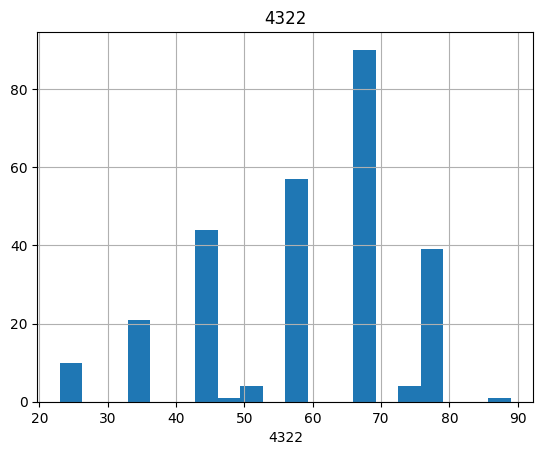

count    271.000000
mean      58.739852
std       14.757096
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       72.500000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4323, dtype: float64


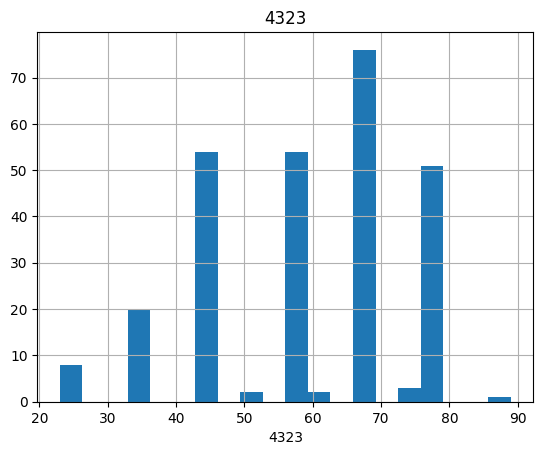

count    271.000000
mean      56.250308
std       15.868485
min       23.000000
5%        34.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4324, dtype: float64


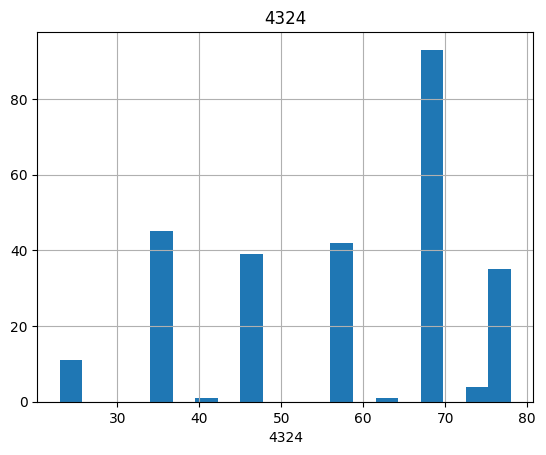

count    271.000000
mean      56.947109
std       14.749474
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       61.500000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4325, dtype: float64


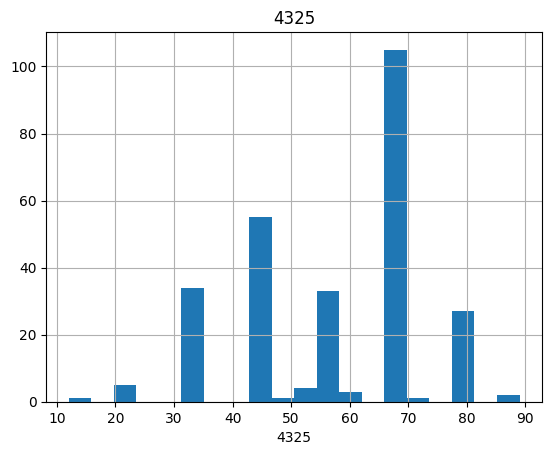

count    271.000000
mean      56.324723
std       14.799953
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       61.500000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4326, dtype: float64


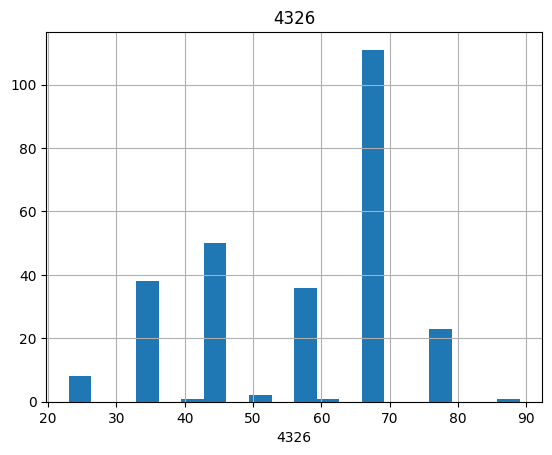

count    271.000000
mean      56.520910
std       14.522141
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4327, dtype: float64


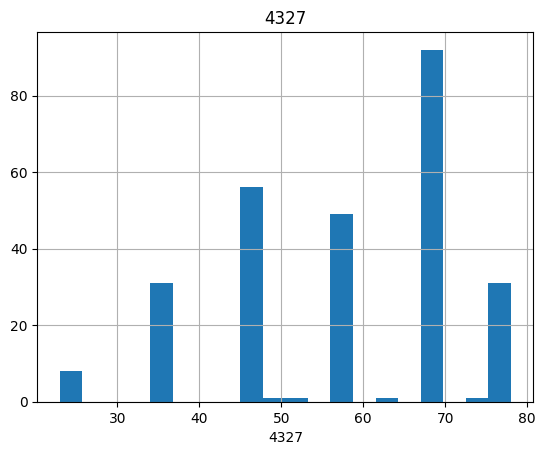

count    271.000000
mean      58.232472
std       14.610607
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4328, dtype: float64


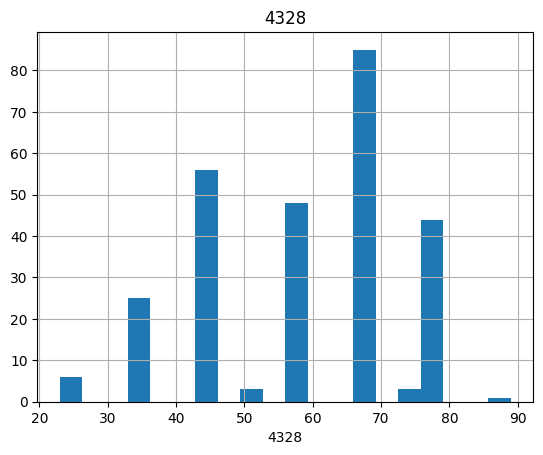

count    271.000000
mean      59.565191
std       18.433611
min       12.000000
5%        23.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       78.000000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4329, dtype: float64


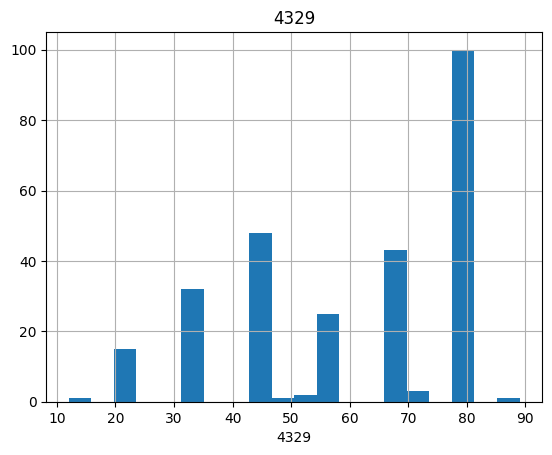

count    271.000000
mean      56.771218
std       14.076815
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       61.500000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       72.500000
99%       78.000000
max       89.000000
Name: 4330, dtype: float64


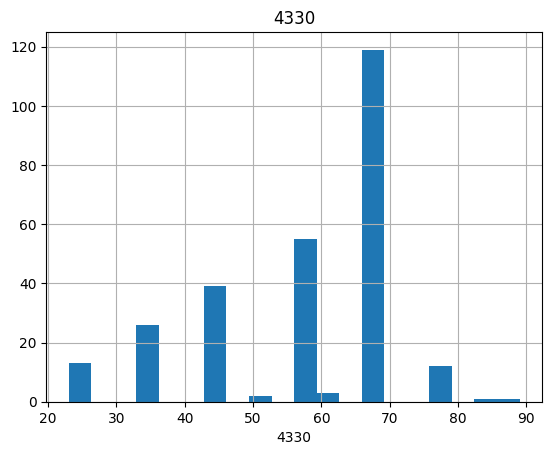

count    271.000000
mean      57.657442
std       13.542010
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       61.500000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4332, dtype: float64


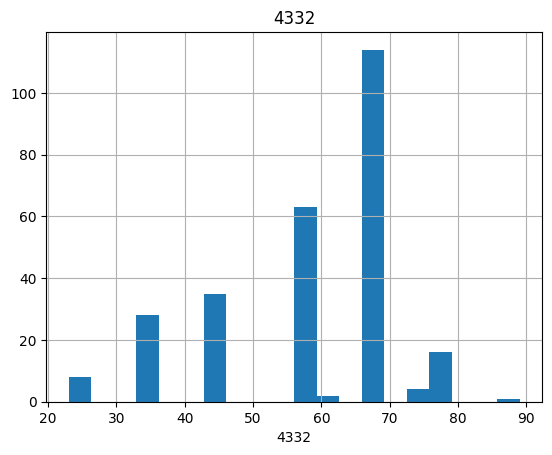

count    271.000000
mean      59.497540
std       16.369983
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       72.500000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4333, dtype: float64


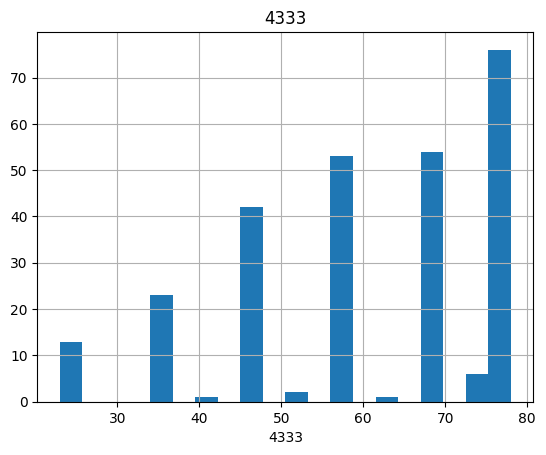

count    271.000000
mean      50.817958
std       16.269353
min       12.000000
5%        23.000000
10%       34.000000
20%       34.000000
30%       34.000000
40%       45.000000
50%       56.000000
60%       56.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       89.000000
Name: 4335, dtype: float64


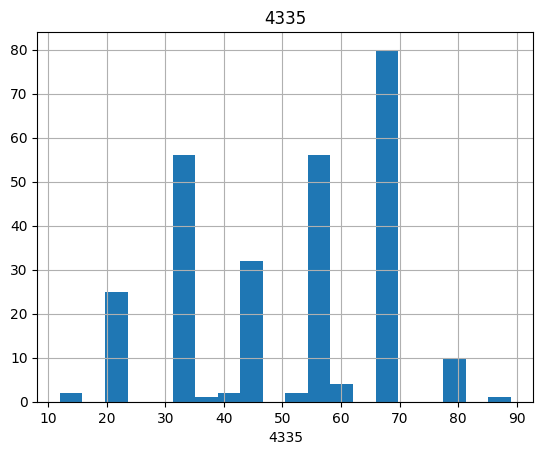

count    271.000000
mean      57.116236
std       15.670577
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4338, dtype: float64


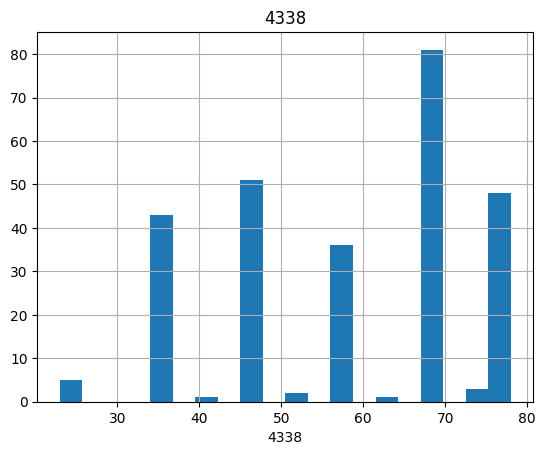

count    271.000000
mean      54.504920
std       14.894394
min       23.000000
5%        28.500000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4339, dtype: float64


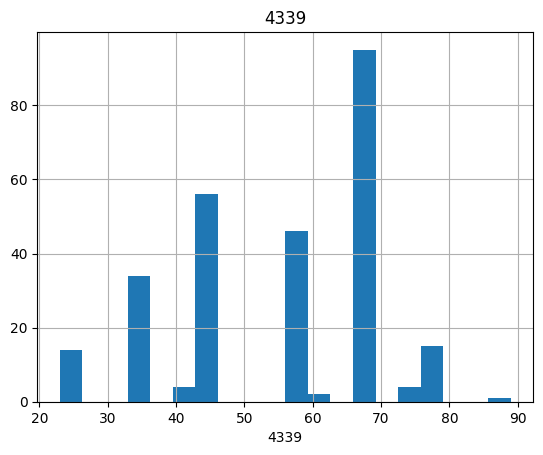

count    271.000000
mean      53.199262
std       15.161445
min       12.000000
5%        23.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       45.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4340, dtype: float64


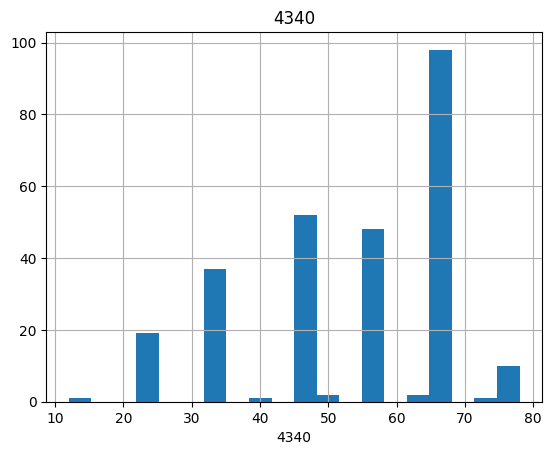

count    271.000000
mean      55.194957
std       14.794589
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4341, dtype: float64


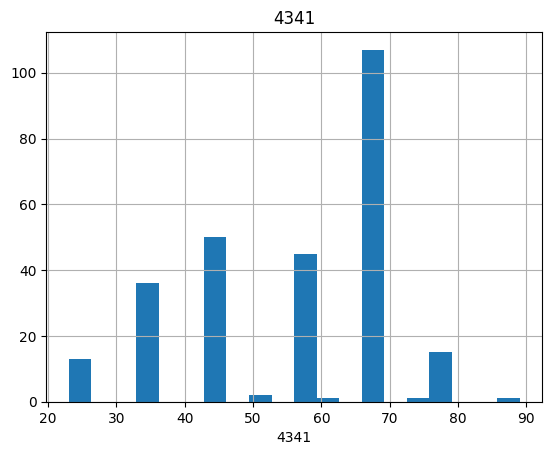

count    271.000000
mean      58.361009
std       14.718160
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4342, dtype: float64


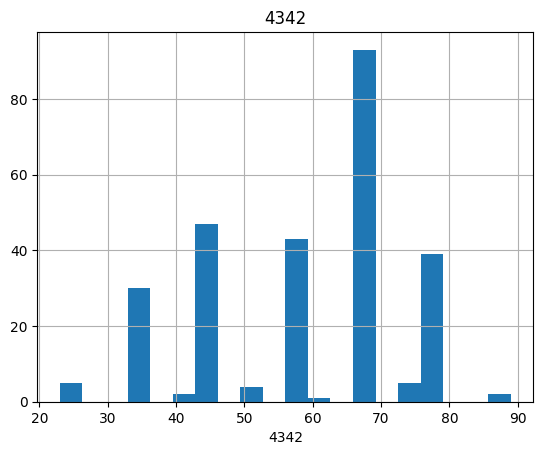

count    271.000000
mean      46.386839
std       16.790151
min       12.000000
5%        23.000000
10%       23.000000
20%       23.000000
30%       34.000000
40%       45.000000
50%       45.000000
60%       56.000000
70%       56.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       74.150000
max       89.000000
Name: 4343, dtype: float64


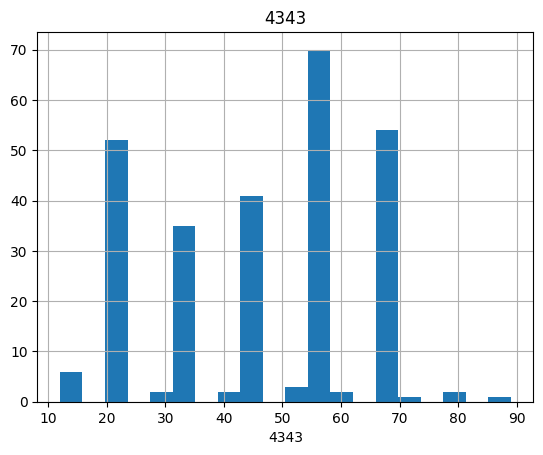

count    271.000000
mean      43.349323
std       16.909239
min       12.000000
5%        23.000000
10%       23.000000
20%       23.000000
30%       34.000000
40%       34.000000
50%       45.000000
60%       56.000000
70%       56.000000
80%       56.000000
90%       56.000000
95%       67.000000
99%       78.000000
max      100.000000
Name: 4344, dtype: float64


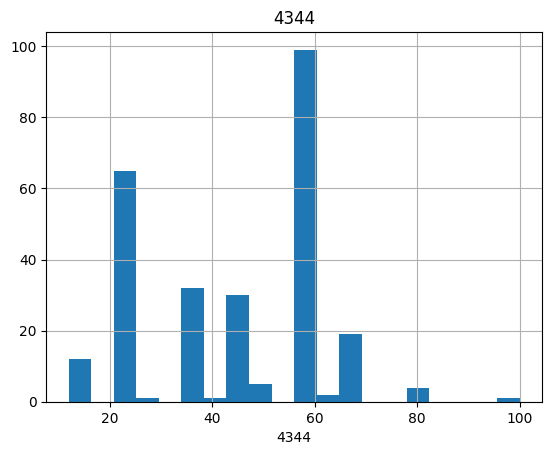

count    271.000000
mean      55.316728
std       15.768308
min       23.000000
5%        28.500000
10%       34.000000
20%       34.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       83.500000
Name: 4345, dtype: float64


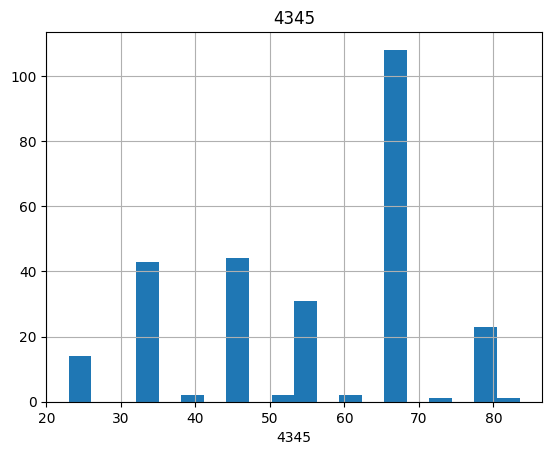

count    271.000000
mean      51.568881
std       17.591752
min       12.000000
5%        23.000000
10%       23.000000
20%       34.000000
30%       34.000000
40%       45.000000
50%       56.000000
60%       61.500000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4348, dtype: float64


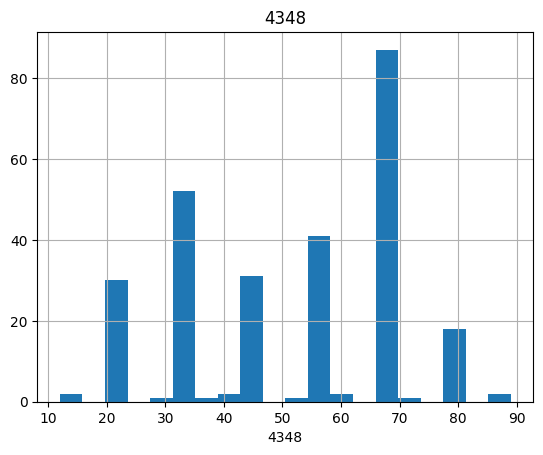

count    271.000000
mean      45.236777
std       16.095356
min       12.000000
5%        23.000000
10%       23.000000
20%       23.000000
30%       34.000000
40%       45.000000
50%       45.000000
60%       56.000000
70%       56.000000
80%       56.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       89.000000
Name: 4349, dtype: float64


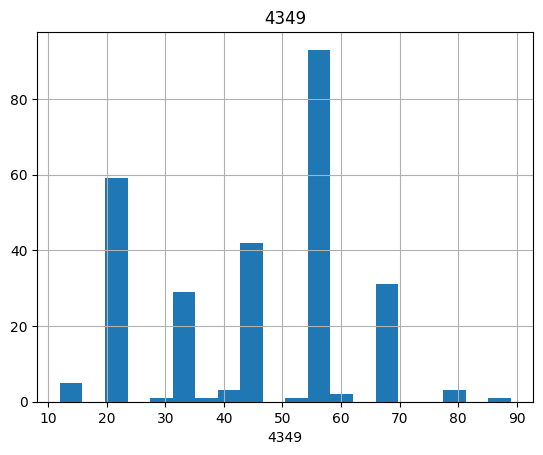

count    271.000000
mean      54.897294
std       14.302681
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4350, dtype: float64


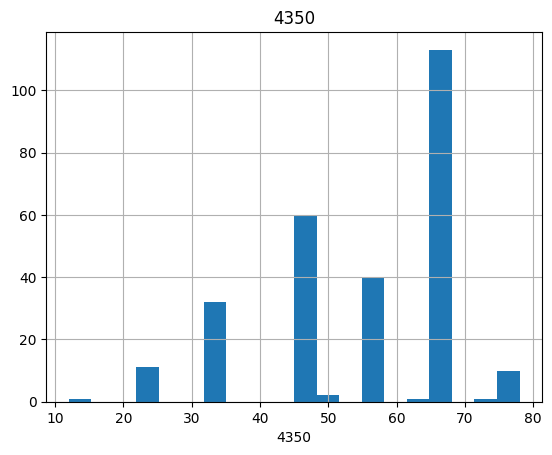

count    271.000000
mean      56.737392
std       14.344484
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max      100.000000
Name: 4351, dtype: float64


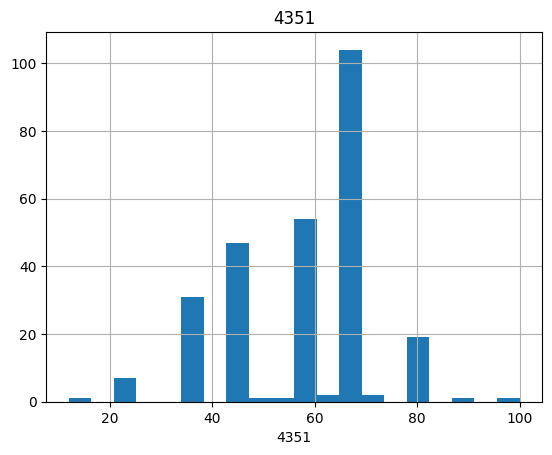

count    271.000000
mean      55.817343
std       14.243089
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4352, dtype: float64


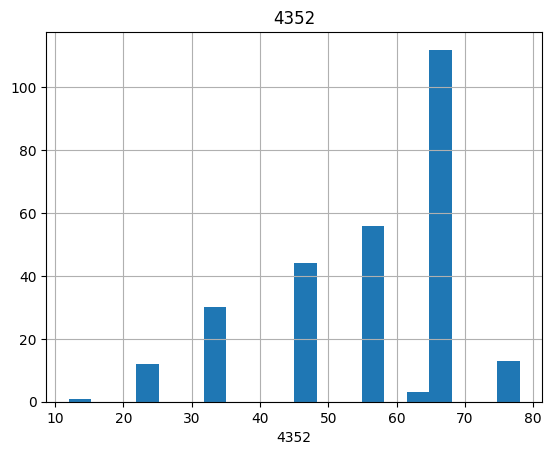

count    271.000000
mean      54.186962
std       15.776835
min       12.000000
5%        34.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       45.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4353, dtype: float64


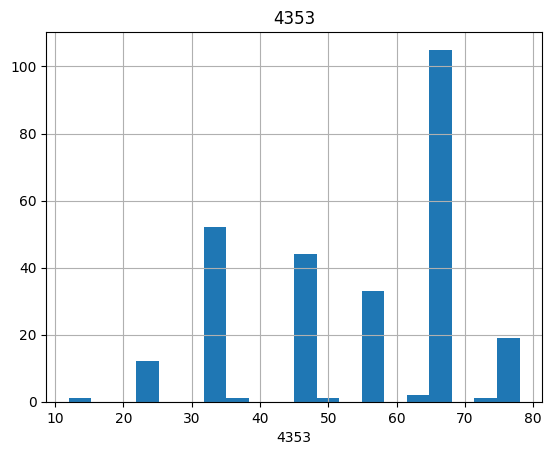

count    271.000000
mean      59.450185
std       17.652623
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       78.000000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       78.000000
Name: 4354, dtype: float64


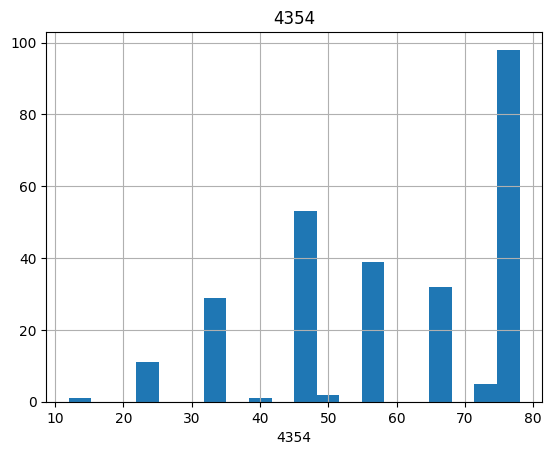

count    271.000000
mean      57.745387
std       14.677008
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4355, dtype: float64


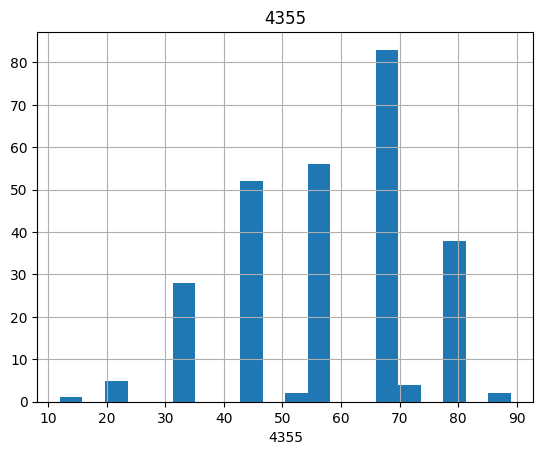

count    271.000000
mean      52.955720
std       15.378794
min       23.000000
5%        23.000000
10%       34.000000
20%       34.000000
30%       45.000000
40%       45.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4356, dtype: float64


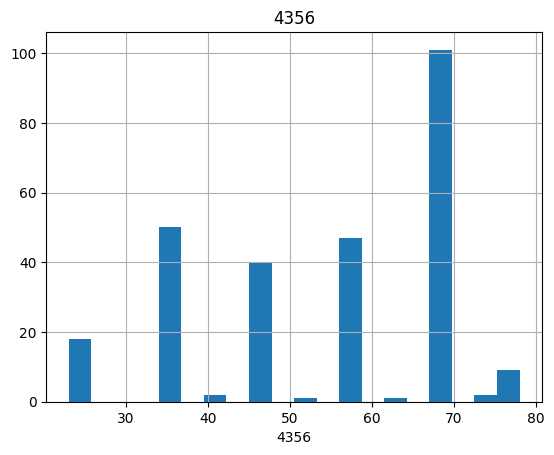

count    271.000000
mean      55.918819
std       14.450966
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       72.500000
99%       78.000000
max       78.000000
Name: 4357, dtype: float64


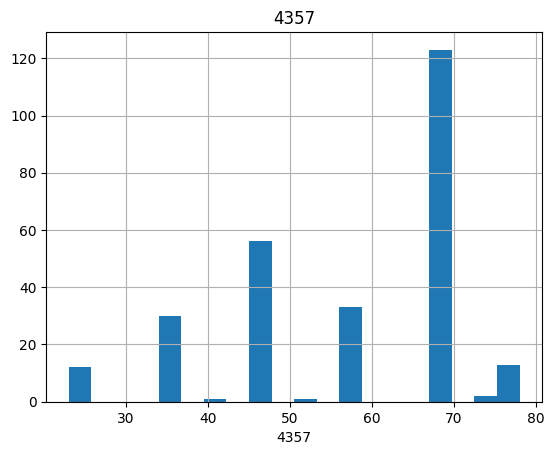

count    271.000000
mean      58.333948
std       16.391679
min        1.000000
5%        28.500000
10%       34.000000
20%       45.000000
30%       56.000000
40%       56.000000
50%       67.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       89.000000
max      100.000000
Name: 4407, dtype: float64


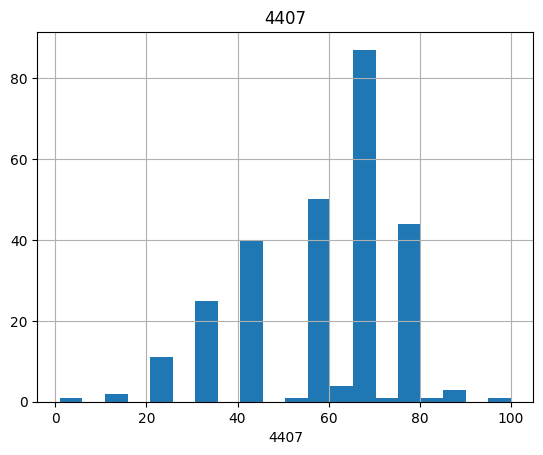

count    271.000000
mean      56.764453
std       15.334661
min       12.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       45.000000
40%       56.000000
50%       56.000000
60%       67.000000
70%       67.000000
80%       67.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4408, dtype: float64


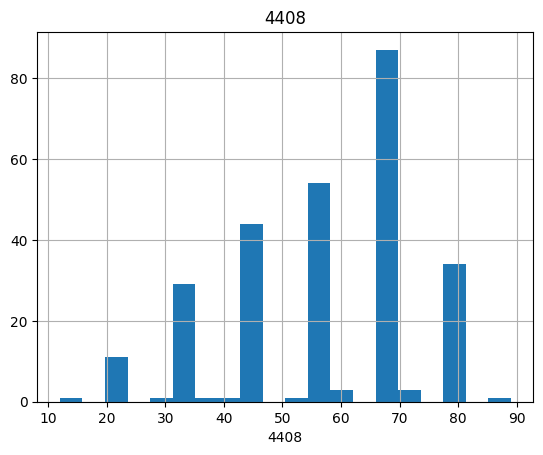

count    271.000000
mean      49.464945
std       16.217151
min       23.000000
5%        23.000000
10%       23.000000
20%       34.000000
30%       34.000000
40%       45.000000
50%       56.000000
60%       56.000000
70%       67.000000
80%       67.000000
90%       67.000000
95%       67.000000
99%       78.000000
max       78.000000
Name: 4423, dtype: float64


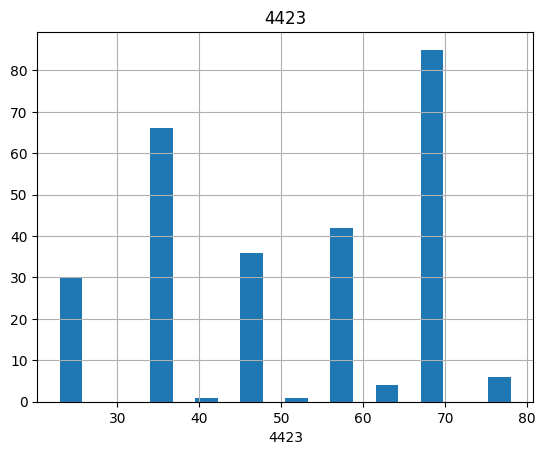

count    271.000000
mean      60.295818
std       17.028369
min       23.000000
5%        34.000000
10%       34.000000
20%       45.000000
30%       50.500000
40%       56.000000
50%       61.500000
60%       67.000000
70%       78.000000
80%       78.000000
90%       78.000000
95%       78.000000
99%       78.000000
max       89.000000
Name: 4426, dtype: float64


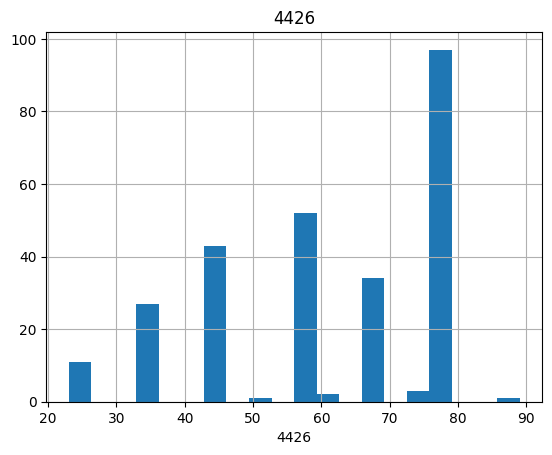

In [ ]:
# NUMERİK DEĞİŞKENLERİN ANALİZİ
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(pivot, col, plot=True)

Numerik değişkenler ile hedef değişken incelemesini yapınız.

In [ ]:
# NUMERİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(pivot, "potential_label", col)

attribute_id          4322
potential_label           
0                57.142636
1                63.071429


attribute_id          4323
potential_label           
0                57.867442
1                62.089286


attribute_id          4324
potential_label           
0                55.343411
1                59.732143


attribute_id          4325
potential_label           
0                54.558915
1                66.116071


attribute_id          4326
potential_label           
0                54.209302
1                64.446429


attribute_id          4327
potential_label           
0                55.735659
1                59.535714


attribute_id          4328
potential_label           
0                57.432558
1                61.303571


attribute_id         4329
potential_label          
0                59.24031
1                60.81250


attribute_id          4330
potential_label           
0                55.872093
1                60.223214


attribute_id  

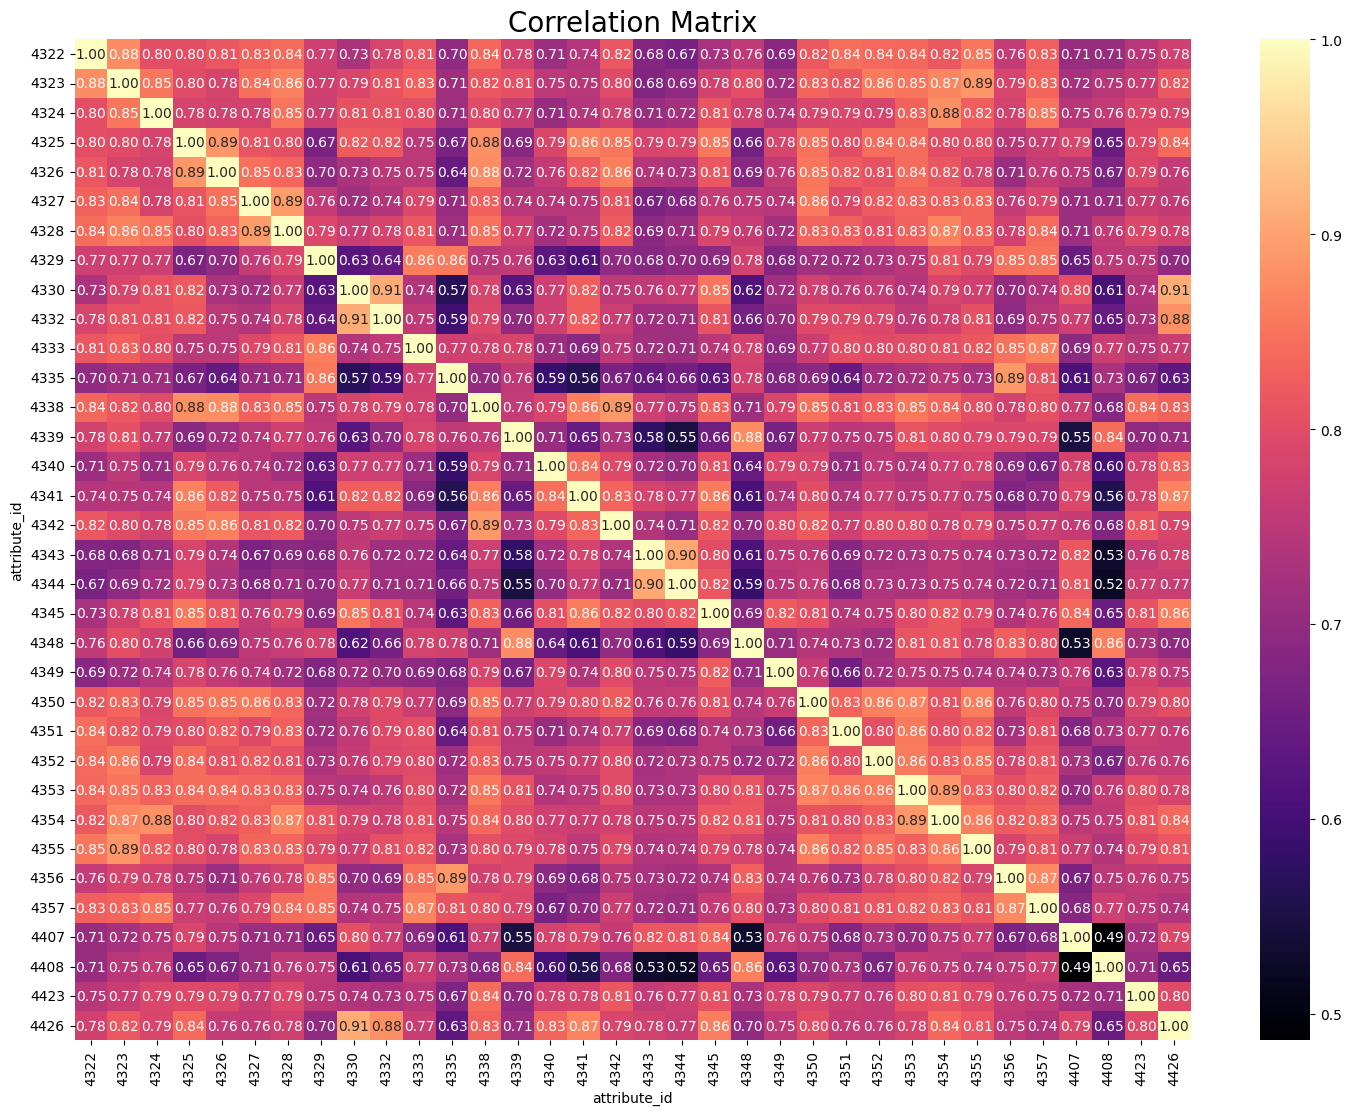

In [ ]:
# KORELASYON ANALİZİ
pivot[num_cols].corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(pivot[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# korelasyon iki değişken arasındaki ilişkinin yönünü ve derecesini gösterir

Feature Extraction uygulayın.

In [ ]:
pivot["min"] = pivot[num_cols].min(axis=1)
pivot["max"] = pivot[num_cols].max(axis=1)
pivot["sum"] = pivot[num_cols].sum(axis=1)
pivot["mean"] = pivot[num_cols].mean(axis=1)
pivot["median"] = pivot[num_cols].median(axis=1)

pivot["mentality"] = pivot["position_id"].apply(lambda x: "defender" if (x == 2) | (x == 5) | (x == 3) | (x == 4) else "attacker")

# 1- Kaleci
# 2- Stoper
# 3- Sağ bek
# 4- Sol bek
# 5- Defansif orta saha
# 6- Merkez orta saha
# 7- Sağ kanat
# 8- Sol kanat
# 9- Ofansif orta saha
# 10- Forvet

In [ ]:
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4407,4408,4423,4426,min,max,sum,mean,median,mentality
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,34.0,56.0,23.0,56.0,1436.5,42.250000,45.0,attacker
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,56.0,78.0,56.0,78.0,2267.0,66.676471,67.0,attacker
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,56.0,78.0,56.0,78.0,2256.0,66.352941,67.0,defender
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,56.0,67.0,45.0,56.0,45.0,78.0,2223.0,65.382353,67.0,defender
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,89.0,56.0,67.0,78.0,56.0,89.0,2278.0,67.000000,67.0,attacker


In [ ]:
pivot.tail()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4407,4408,4423,4426,min,max,sum,mean,median,mentality
266,1907347,5,0,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,78.0,78.0,78.0,56.0,56.0,89.0,2344.0,68.941176,67.0,defender
267,1907347,6,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,67.0,78.0,56.0,78.0,2311.0,67.970588,67.0,attacker
268,1909532,10,0,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,34.0,34.0,34.0,23.0,23.0,56.0,1321.0,38.852941,34.0,attacker
269,1909724,2,1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,67.0,78.0,56.0,78.0,2509.0,73.794118,78.0,defender
270,1909728,7,1,78.0,67.0,67.0,78.0,67.0,67.0,67.0,...,78.0,67.0,67.0,78.0,56.0,78.0,2377.0,69.911765,67.0,attacker


Adım 6: Label Encoder fonksiyonunu kullanarak bu sefer de yeni oluşturduğumuz değişken olan "mentality” kategorisini (attacker, defender) sayısal olarak ifade ediniz.

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


labelEncoderCols = ["mentality"]

for col in labelEncoderCols:
    pivot = label_encoder(pivot, col)

In [ ]:
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4407,4408,4423,4426,min,max,sum,mean,median,mentality
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,34.0,56.0,23.0,56.0,1436.5,42.250000,45.0,0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,56.0,78.0,56.0,78.0,2267.0,66.676471,67.0,0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,56.0,78.0,56.0,78.0,2256.0,66.352941,67.0,1
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,56.0,67.0,45.0,56.0,45.0,78.0,2223.0,65.382353,67.0,1
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,89.0,56.0,67.0,78.0,56.0,89.0,2278.0,67.000000,67.0,0


Adım 7: Sayısal değişken kolonlarını “num_cols” adıyla bir listeye atayınız.

In [ ]:
num_cols = [col for col in pivot.columns if col not in ["player_id", "position_id", "potential_label"]]

In [ ]:
num_cols

In [ ]:
# ya da
# Adım 7 deki Sayısal değişken kolonlarını “num_cols” adıyla bir listeye atayınız. görevinde eğer
num_cols = pivot.columns[3:]   # bu fonksiyonu kullanarak num_cols nesnesi oluşturduysanız bu çıktı yukarıda bahsettiğimiz gibi index olarak geleceği için
# standartlaştırma öncesi listeye çevirme işlemini uygulayıp ondan sonra scale işlemi yapmamız gerekecek

num_cols = [col for col in pivot.columns if col not in ["player_id", "position_id", "potential_label"]]


In [ ]:
# yeni oluşturduğumuz değişkenleri bir listeye atayıp bu listeyi de numerik kolonlar arasına ekliyoruz
pivot.head()
lst = ["min","max","sum","mean","median"]
num_cols = list(num_cols)

for i in lst:
    num_cols.append(i)


# yeni değişkenlerle beraber standart scaler ı uyguluyoruz.
scaler = StandardScaler()
pivot[num_cols] = scaler.fit_transform(pivot[num_cols])
pivot.head()
pivot[num_cols]
pivot.head()

# ADIM 8

Adım 8: Kaydettiğiniz bütün “num_cols” değişkenlerindeki veriyi ölçeklendirmek için StandardScaler uygulayınız.

In [ ]:
ss = StandardScaler()

for i in num_cols:
    pivot[i] = ss.fit_transform(pivot[[i]])
num_cols = pivot.columns[3:]
pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,-1.223858,-1.035633,-1.126240,-1.009285,-0.541797,-0.690375,-0.535091,-1.067288,-1.205671,-1.004927,-1.313773,-1.041775,-0.693269,-0.435633,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741
1,1356362,9,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,0.459154,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,1.229965,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
2,1356375,3,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.077240,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
3,1356375,4,0,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,0.459154,0.996474,1.335139,1.580363,0.185069,0.799406,0.588047,-0.082751,0.097800,0.043412,0.878802,1.354645,0.847750,0.716763,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741
4,1356411,9,0,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,0.459154,0.996474,0.631888,0.100564,0.185069,0.799406,1.336806,0.573607,0.749536,0.742305,0.252352,1.354645,0.077240,0.716763,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611


Adım 9: Elimizdeki veri seti üzerinden minimum hata ile futbolcuların potansiyel etiketlerini tahmin eden bir makine öğrenmesi modeli geliştiriniz. (Roc_auc, f1, precision, recall, accuracy metriklerini yazdırınız.)

In [ ]:
y = pivot["potential_label"]
X = pivot.drop(["potential_label", "player_id"], axis=1)

In [ ]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   # ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]


    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")


base_models(X, y, scoring="accuracy")

In [ ]:
Base Models....
accuracy: 0.8633 (LR)
accuracy: 0.8155 (KNN)
accuracy: 0.8083 (CART)
accuracy: 0.8671 (RF)
accuracy: 0.845 (Adaboost)
accuracy: 0.8524 (GBM)
accuracy: 0.8597 (XGBoost)
accuracy: 0.8524 (LightGBM)

In [ ]:
base_models(X, y, scoring="precision")

In [ ]:
Base Models....
precision: 0.7354 (LR)
precision: 0.7778 (KNN)
precision: 0.5671 (CART)
precision: 0.7887 (RF)
precision: 0.6416 (Adaboost)
precision: 0.7143 (GBM)
precision: 0.7051 (XGBoost)
precision: 0.7211 (LightGBM)

In [ ]:
base_models(X, y, scoring="recall")

In [ ]:
Base Models....
recall: 0.5185 (LR)
recall: 0.1793 (KNN)
recall: 0.5721 (CART)
recall: 0.4639 (RF)
recall: 0.5867 (Adaboost)
recall: 0.5702 (GBM)
recall: 0.5692 (XGBoost)
recall: 0.5175 (LightGBM)

In [ ]:
base_models(X, y, scoring="f1")

In [ ]:
Base Models....
f1: 0.5888 (LR)
f1: 0.2813 (KNN)
f1: 0.578 (CART)
f1: 0.5858 (RF)
f1: 0.5966 (Adaboost)
f1: 0.5889 (GBM)
f1: 0.6204 (XGBoost)
f1: 0.5885 (LightGBM)

In [ ]:
base_models(X, y, scoring="roc_auc")

In [ ]:
Base Models....
roc_auc: 0.8416 (LR)
roc_auc: 0.7059 (KNN)
roc_auc: 0.7049 (CART)
roc_auc: 0.8875 (RF)
roc_auc: 0.7973 (Adaboost)
roc_auc: 0.8753 (GBM)
roc_auc: 0.8524 (XGBoost)
roc_auc: 0.8693 (LightGBM)

# EKSTRA AŞAMALAR

# Hyperparameter optimization

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


In [ ]:
# Bu fonksiyonda şunu yapıyoruz; öncesindeki hataya bak hiperparametre değerlerini bul,
# hiperparametre değerleri ile sonrasındaki hatasını bul şeklindedir. Çıktılarımız aşağıda buradan gözlemleyelim

def hyperparameter_optimization(X, y, cv=5, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models


best_models = hyperparameter_optimization(X, y)

In [ ]:
Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.7469
roc_auc (After): 0.7469
KNN best params: {'n_neighbors': 5}

########## CART ##########
roc_auc (Before): 0.7159
roc_auc (After): 0.7226
CART best params: {'max_depth': 1, 'min_samples_split': 2}

########## RF ##########
roc_auc (Before): 0.8998
roc_auc (After): 0.9036
RF best params: {'max_depth': 15, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 0.8668
roc_auc (After): 0.8861
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

########## LightGBM ##########
roc_auc (Before): 0.8891
roc_auc (After): 0.8921
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 500}

In [ ]:
best_models = hyperparameter_optimization(X, y, cv=5, scoring="accuracy")

In [ ]:
best_models = hyperparameter_optimization(X, y, cv=5, scoring="precision")

In [ ]:
best_models = hyperparameter_optimization(X, y, cv=5, scoring="recall")

In [ ]:
best_models = hyperparameter_optimization(X, y, cv=5, scoring="f1")

# Stacking & Ensemble Learning

In [ ]:
# 3 modelin cross validation hatasına bakacağız 3 metrik açısından bunları değerlendirip ekrana print edeceğiz

# özetle şunu yapıyoruz, knn gel bakalım, rf gel bakalım, gbm, lightgbm, xgboost gel bakalım hepiniz bi model kurun
# hepiniz bi tahminde bulunun hepinizi bir araya getirdik bir gözlem birimi geldiğinde tahmini hep birlikte yapacağızdır.

def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"Precision: {cv_results['test_precision'].mean()}")
    print(f"Recall: {cv_results['test_recall'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf


voting_clf = voting_classifier(best_models, X, y)

In [ ]:
Voting Classifier...
Accuracy: 0.8487179487179487
Precision: 0.8141025641025642
Recall: 0.3742690058479532
F1Score: 0.5013461538461539
ROC_AUC: 0.8753319407456216

# Prediction for a New Observation

In [ ]:
import joblib

X.columns

Index(['position_id', '4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4332', '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343', '4344', '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4407', '4408', '4423', '4426'], dtype='object', name='attribute_id')

In [ ]:
# random user diyerek bir kullanıcı seçiyoruz
random_user = X.sample(1, random_state=45)

In [ ]:
# voting_clf ile bu random user ı tahmin ediyoruz
voting_clf.predict(random_user)

array([0])

In [ ]:
# Çalışma kapandığında bu model uçmasın istiyorsak joblib.dumb ile modelimizi kaydediyoruz, isimlendirmesini yapıyoruz
joblib.dump(voting_clf, "scotium_voting.pkl")

['scotium_voting.pkl']

In [ ]:
# bunun çalışıp çalışmadığını nasıl anlarız, yine joblibi kullanıp yükle deriz bu sefer
new_model = joblib.load("scotium_voting.pkl")

In [ ]:
# new_model olarak kaydetmiştik yüklediğimizi şimdi new model predict dersek random seçtiği bir kullanıcıyı tahmin eder
new_model.predict(random_user)

array([0])

# Adım 10: Değişkenlerin önem düzeyini belirten feature_importance grafiğine bakınız

[LightGBM] [Info] Number of positive: 56, number of negative: 215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 271, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.206642 -> initscore=-1.345286
[LightGBM] [Info] Start training from score -1.345286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


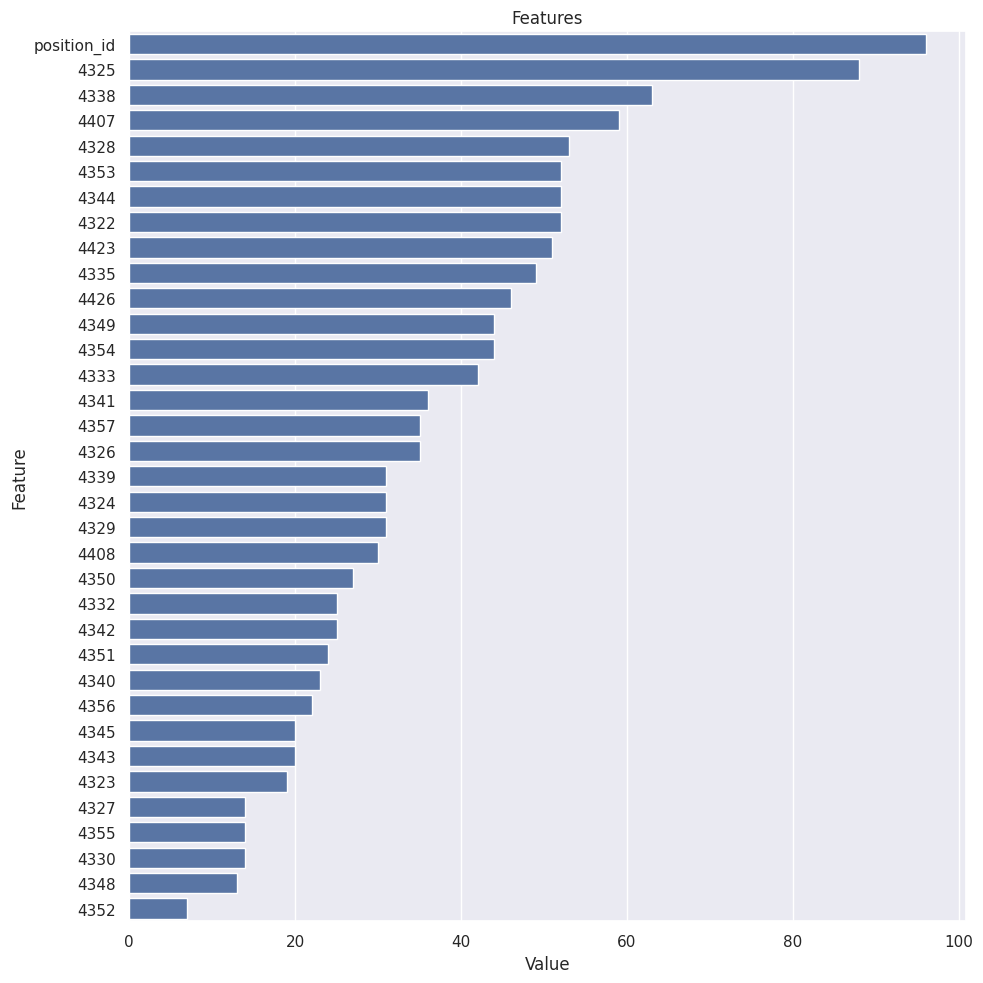

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


model = LGBMClassifier()
model.fit(X, y)

plot_importance(model, X)